<a href="https://colab.research.google.com/github/enitin-agarwal/azureforaws/blob/master/MIMICNLP_NOTEEVENTS_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = 'DIAGNOSES_ICD.csv'
diagnoses_icd_df = pd.read_csv(file_path)
diagnoses_icd_df.info()
diagnoses_icd_df.iloc[0]
print(len(diagnoses_icd_df))

FileNotFoundError: [Errno 2] No such file or directory: 'DIAGNOSES_ICD.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Uploading the NOTEEVENTS or any file in colab**

In [ ]:
# upload file from local drive and open it for reading (NOTEEVENTS file)
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd
import spacy
import scispacy
import gensim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from transformers import AutoModel, AutoTokenizer
import torch

# Load NLP Models
nlp_spacy = spacy.load("en_core_web_sm")
nlp_scispacy = spacy.load("en_core_sci_md")

# Load Data from Multiple MIMIC-III Tables
data_paths = {
    "notes": "noteevents.csv",
    "admissions": "admissions.csv",
    "diagnoses": "diagnoses_icd.csv"
}
notes_df = pd.read_csv(data_paths["notes"], usecols=["SUBJECT_ID", "HADM_ID", "TEXT"], nrows=1000)
admissions_df = pd.read_csv(data_paths["admissions"], usecols=["SUBJECT_ID", "HADM_ID", "ADMISSION_TYPE", "DIAGNOSIS"])
diagnoses_df = pd.read_csv(data_paths["diagnoses"], usecols=["SUBJECT_ID", "HADM_ID", "ICD9_CODE"])

# Merge Data to Enrich Context
merged_df = notes_df.merge(admissions_df, on=["SUBJECT_ID", "HADM_ID"], how="left")
merged_df = merged_df.merge(diagnoses_df, on=["SUBJECT_ID", "HADM_ID"], how="left")

# Entity Extraction
def extract_entities(text, model):
    doc = model(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

merged_df["spacy_entities"] = merged_df["TEXT"].apply(lambda x: extract_entities(x, nlp_spacy))
merged_df["scispacy_entities"] = merged_df["TEXT"].apply(lambda x: extract_entities(x, nlp_scispacy))

# Word2Vec Embeddings
sentences = [note.split() for note in merged_df["TEXT"].dropna()]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
word_vectors = word2vec_model.wv

def tsne_plot(model, title):
    words = list(model.index_to_key)[:200]
    X = model[words]
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(12, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
    plt.title(title)
    plt.show()

tsne_plot(word_vectors, "Word2Vec t-SNE Visualization")

# ClinicalBERT Embeddings
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

merged_df["bert_embeddings"] = merged_df["TEXT"].apply(get_bert_embeddings)

# Save Processed Data
merged_df.to_csv("processed_notes.csv", index=False)

print("NLP processing complete. Data merged and saved.")


ModuleNotFoundError: No module named 'scispacy'

In [ ]:
# read the uploaded file in a dataframe
noteevents_df = pd.read_csv('NOTEEVENTS.csv')

NameError: name 'pd' is not defined

# **Filter the data in files to create a new relevant dataframe**

---



---



---



In [ ]:
icd9_430_patients_discharge_summary_df = pd.DataFrame(columns=['SUBJECT_ID', 'CATEGORY', 'TEXT'])
patients_dict = {"SUBJECT_ID":[],"CATEGORY":[],"TEXT":[]};

In [ ]:
for i in range(0, len(noteevents_df)):
  if((noteevents_df.loc[i, 'SUBJECT_ID'] in arr_subject_id) and (noteevents_df.loc[i, 'CATEGORY'] == 'Social Work')):
   patients_dict["SUBJECT_ID"].append(noteevents_df.loc[i, 'SUBJECT_ID'])
   patients_dict["CATEGORY"].append(noteevents_df.loc[i, 'CATEGORY'])
   patients_dict["TEXT"].append(noteevents_df.loc[i, 'TEXT'])

In [ ]:
patients_df = pd.DataFrame(patients_dict)

#**NLP TUTORIAL**


In [ ]:
# Install Packages
!pip install spacy
!pip install scispacy
!pip install --upgrade gensim==4.3.0
!pip install --upgrade scipy==1.11.3
!pip install medspacy
!pip install gensim==4.3.2
!pip install umap-learn

# Then install the scientific model
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_md-0.5.3.tar.gz



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.7/419.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 20.5 MB/s eta 0:00:00
  Created wheel for medspacy: filename=medspacy-1.3.1-py3-none-any.whl size=313656 sha256=711b32b83d05b26d1d6db11f25f7be6f3e15528ad66eaf83a75ae0

Loading NLP model...

Processing sample text...

Creating word embeddings...

Creating t-SNE visualization...

Extracted Entities:
{
  "MEDICATIONS": [
    {
      "text": "aspirin",
      "count": 1
    },
    {
      "text": "metformin",
      "count": 1
    },
    {
      "text": "aspirin",
      "count": 1
    },
    {
      "text": "beta blockers",
      "count": 1
    }
  ],
  "CONDITIONS": [
    {
      "text": "myocardial infarction",
      "count": 1
    },
    {
      "text": "diabetes mellitus",
      "count": 1
    },
    {
      "text": "hypertension",
      "count": 1
    }
  ],
  "SYMPTOMS": [
    {
      "text": "chest pain",
      "count": 1
    },
    {
      "text": "shortness of breath",
      "count": 1
    },
    {
      "text": "fatigue",
      "count": 1
    },
    {
      "text": "dizziness",
      "count": 1
    }
  ]
}

t-SNE plot has been created. Use plt.show() to display it.


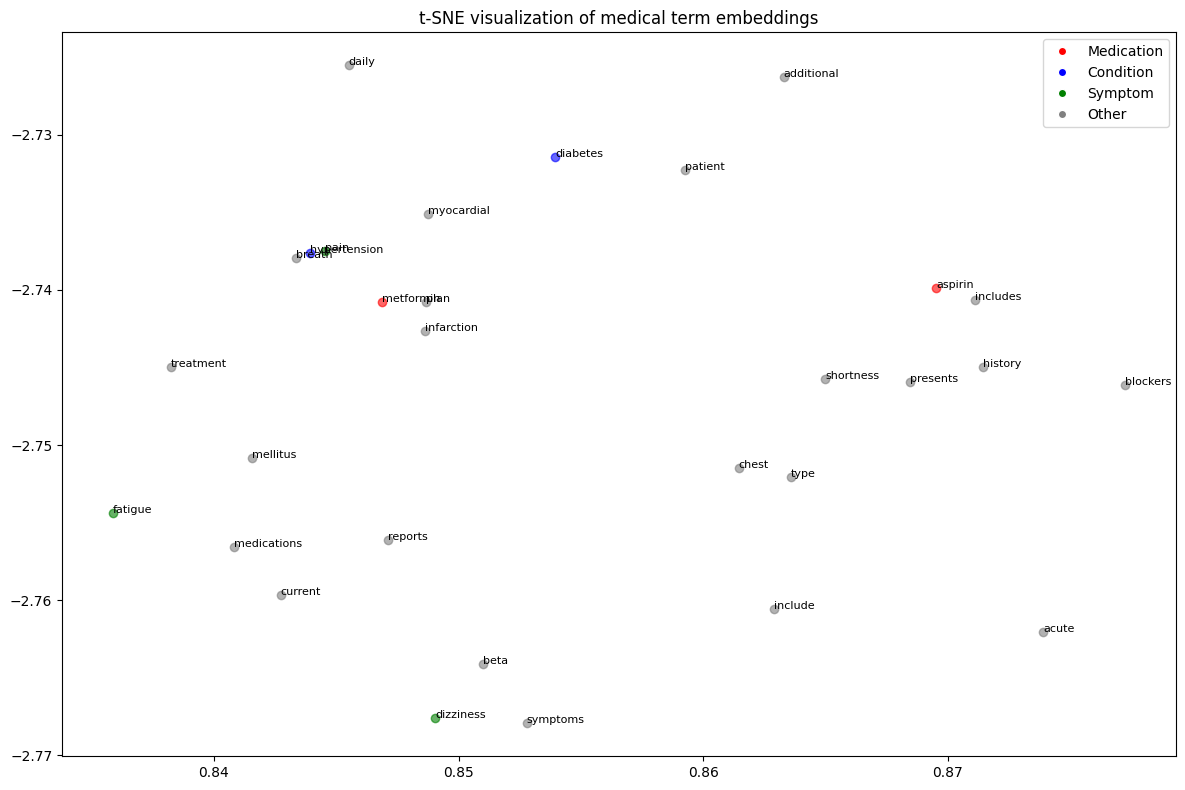

In [ ]:
import spacy
import scispacy
import numpy as np
import pandas as pd
from collections import defaultdict
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import json

class MedicalNLPAnalyzer:
    def __init__(self):
        """Initialize NLP models and tools."""
        print("Loading NLP model...")
        self.nlp = spacy.load("en_core_sci_md")

        # Add custom entity patterns
        ruler = self.nlp.add_pipe("entity_ruler", before="ner")
        patterns = [
            {"label": "MEDICATION", "pattern": [{"LOWER": "aspirin"}]},
            {"label": "MEDICATION", "pattern": [{"LOWER": "metformin"}]},
            {"label": "MEDICATION", "pattern": [{"LOWER": "beta"}, {"LOWER": "blockers"}]},
            {"label": "CONDITION", "pattern": [{"LOWER": "myocardial"}, {"LOWER": "infarction"}]},
            {"label": "CONDITION", "pattern": [{"LOWER": "diabetes"}, {"LOWER": "mellitus"}]},
            {"label": "CONDITION", "pattern": [{"LOWER": "hypertension"}]},
            {"label": "SYMPTOM", "pattern": [{"LOWER": "chest"}, {"LOWER": "pain"}]},
            {"label": "SYMPTOM", "pattern": [{"LOWER": "shortness"}, {"LOWER": "of"}, {"LOWER": "breath"}]},
            {"label": "SYMPTOM", "pattern": [{"LOWER": "fatigue"}]},
            {"label": "SYMPTOM", "pattern": [{"LOWER": "dizziness"}]}
        ]
        ruler.add_patterns(patterns)

    def clean_text(self, text):
        """Clean and preprocess text."""
        return ' '.join([token.text.lower() for token in self.nlp(text)
                        if not token.is_space and not token.is_punct])

    def process_text(self, text):
        """Process text and extract entities and tokens."""
        # Clean text
        cleaned_text = self.clean_text(text)
        doc = self.nlp(cleaned_text)

        # Extract tokens for word embeddings
        tokens = [token.text for token in doc
                 if not token.is_stop and not token.is_punct and len(token.text) > 2]

        # Extract entities
        entities = {
            "MEDICATIONS": [],
            "CONDITIONS": [],
            "SYMPTOMS": []
        }

        for ent in doc.ents:
            if ent.label_ in ["MEDICATION", "CHEMICAL"]:
                entities["MEDICATIONS"].append({"text": ent.text, "count": 1})
            elif ent.label_ in ["CONDITION", "DISEASE"]:
                entities["CONDITIONS"].append({"text": ent.text, "count": 1})
            elif ent.label_ == "SYMPTOM":
                entities["SYMPTOMS"].append({"text": ent.text, "count": 1})

        return tokens, entities

    def create_word_embeddings(self, tokens, min_count=1):
        """Create word embeddings using Word2Vec."""
        print("\nCreating word embeddings...")
        model = Word2Vec(sentences=[tokens],
                        vector_size=100,
                        window=5,
                        min_count=min_count,
                        workers=4)
        return model

    def visualize_embeddings(self, model, n_components=2):
        """Create t-SNE visualization with enhanced grouping."""
        print("\nCreating t-SNE visualization...")
        # Get word vectors
        words = list(model.wv.index_to_key)
        vectors = np.array([model.wv[word] for word in words])

        # Apply t-SNE
        tsne = TSNE(n_components=n_components,
                    perplexity=min(30, len(words)-1),
                    random_state=42)
        reduced_vectors = tsne.fit_transform(vectors)

        # Create visualization
        plt.figure(figsize=(12, 8))

        # Define color scheme for different word types
        color_map = {
            'medication': 'red',
            'condition': 'blue',
            'symptom': 'green',
            'other': 'gray'
        }

        # Plot points with different colors based on word type
        for i, word in enumerate(words):
            word_type = 'medication' if word in ['aspirin', 'metformin'] else \
                       'condition' if word in ['diabetes', 'hypertension'] else \
                       'symptom' if word in ['pain', 'fatigue', 'dizziness'] else 'other'

            plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1],
                       c=color_map[word_type], alpha=0.6)
            plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                        fontsize=8)

        # Add legend
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor=color, label=label.title())
                         for label, color in color_map.items()]
        plt.legend(handles=legend_elements)

        plt.title('t-SNE visualization of medical term embeddings')
        plt.tight_layout()
        return plt
